<a href="https://colab.research.google.com/github/sri-spirited/fastai_course_v3_notes/blob/master/1_3_DogsvCats_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
from google.colab import files

uploaded = files.upload()

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 65 bytes


In [0]:
# Go to the Kaggle competition page you would like to download data from , and browse to Data
# Scroll down to the data section and click API button, it will copy the command automatically.
!kaggle competitions download -c dogs-vs-cats-redux-kernels-edition -p /content

 98% 267M/271M [00:03<00:00, 61.9MB/s]
100% 271M/271M [00:03<00:00, 74.2MB/s]
 97% 529M/544M [00:06<00:00, 89.9MB/s]
100% 544M/544M [00:07<00:00, 80.6MB/s]
  0% 0.00/111k [00:00<?, ?B/s]
100% 111k/111k [00:00<00:00, 114MB/s]


In [0]:
# !unzip \*.zip
ls -a

./   .config/      sample_submission.csv  test.zip
../  sample_data/  submission.csv         train.zip


In [0]:
!unzip train.zip;
!unzip test.zip;

In [0]:
from fastai.vision import *
from fastai.metrics import accuracy
import numpy as np
import pandas as pd

In [0]:
bs = 64

In [0]:
ls -a

./   .config/      sample_submission.csv  test/     train/
../  sample_data/  submission.csv         test.zip  train.zip


In [0]:
!pwd

/content


In [0]:
from pathlib import Path
p = Path('/content/')

In [0]:
os.listdir(p)

['.config',
 'train',
 'train.zip',
 'test',
 'test.zip',
 'sample_submission.csv',
 'sample_data']

In [0]:
path_img = p/'train'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/content/train/dog.9671.jpg'),
 PosixPath('/content/train/cat.6869.jpg'),
 PosixPath('/content/train/dog.11457.jpg'),
 PosixPath('/content/train/dog.9068.jpg'),
 PosixPath('/content/train/cat.10642.jpg')]

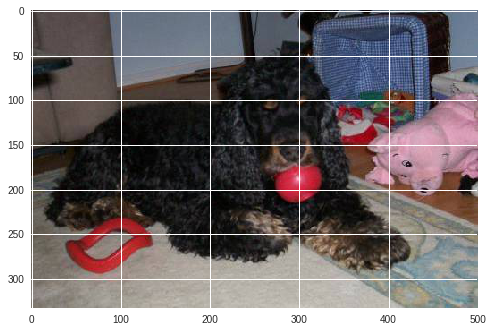

In [0]:
img = plt.imread(f'{fnames[0]}')
plt.imshow(img);

In [0]:
fnames[0]

PosixPath('/content/train/dog.8911.jpg')

In [0]:
img.shape

(333, 500, 3)

In [0]:
pat = r'/([^/]+)\.\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs).normalize(imagenet_stats)

In [0]:
data

ImageDataBunch;

Train: LabelList (20000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
dog,cat,cat,cat,cat
Path: /content/train;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
cat,cat,cat,cat,cat
Path: /content/train;

Test: None

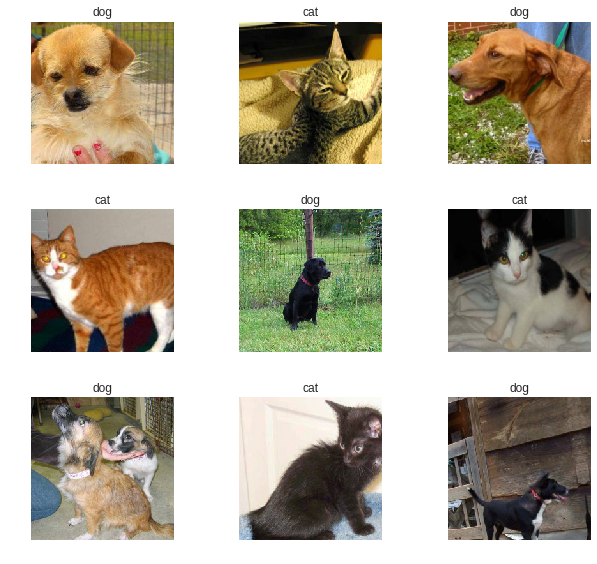

In [0]:
data.show_batch(rows=3, figsize=(9,8))

In [0]:
print(data.classes)
len(data.classes),data.c

['cat', 'dog']


(2, 2)

In [0]:
print(data.classes)
len(data.classes),data.c

['cat', 'dog']


(2, 2)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy) 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 65094777.21it/s]


In [0]:
%%timeit
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
1,0.064627,0.031665,0.988600,05:35
2,0.041744,0.027194,0.991200,05:44


epoch,train_loss,valid_loss,accuracy,time
1,0.047313,0.026967,0.991000,06:19
2,0.032444,0.023782,0.990400,06:33


epoch,train_loss,valid_loss,accuracy,time
1,0.039566,0.021372,0.991000,06:35
2,0.032772,0.019521,0.992400,06:33


epoch,train_loss,valid_loss,accuracy,time
1,0.029492,0.024573,0.991800,06:32
2,0.029347,0.019744,0.992800,06:26


1 loop, best of 3: 12min 52s per loop


In [0]:
learn.export()

In [0]:
%%timeit
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
The slowest run took 8.48 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 3: 9.24 s per loop


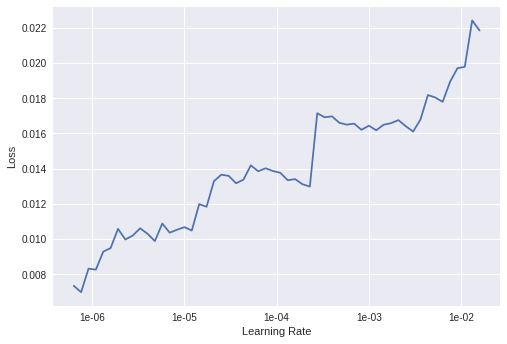

In [0]:
learn.recorder.plot()

In [0]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-8,1e-6))

epoch,train_loss,valid_loss,accuracy,time
1,0.026458,0.022000,0.992800,06:27
2,0.026524,0.019911,0.992800,06:26


In [0]:
!ls -a

.   .config  sample_data	    test      train
..  export   sample_submission.csv  test.zip  train.zip


In [0]:
!find . -name *.pkl

./train/export.pkl


In [0]:
!mv ./train/export.pkl ./export.pkl

In [0]:
!find . -name *.pkl

./export.pkl


In [0]:
!pwd

/content


In [0]:
test = 

In [0]:
learn = load_learner(path = '/content', test=ImageList.from_folder('/content/test'))

In [0]:
preds, _ = learn.get_preds(ds_type=DatasetType.Test)

In [0]:
labelled_preds = [' '.join([learn.data.classes[i] for i,p in enumerate(pred) if p>0.5]) for pred in preds]

In [0]:
labelled_preds[:5]

['cat', 'dog', 'cat', 'cat', 'cat']

In [0]:
fnames_test = [f.name[:-4] for f in learn.data.test_ds.items]

In [0]:
fnames_test

In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame([fnames_test,labelled_preds]).T
df.columns = ['id', 'label']

In [0]:
df['label'] = df['label'].map({'cat':0, 'dog':1})

In [0]:
df.head()

,id,label
0,3573,0
1,6169,1
2,7607,0
3,2807,0
4,3873,0


In [0]:
df.to_csv(p/'submission.csv', index=False)

In [0]:
!kaggle competitions submit -c dogs-vs-cats-redux-kernels-edition -f {p/'submission.csv'} -m "My first submission"

100% 86.8k/86.8k [00:07<00:00, 11.1kB/s]
Successfully submitted to Dogs vs. Cats Redux: Kernels Edition

In [0]:
from google.colab import files
files.download('submission.csv') 

In [0]:
import pandas as pd
from google.colab import files

In [0]:
df = files.upload()

Saving submission.csv to submission.csv


In [0]:
df = pd.read_csv('submission.csv')

In [0]:
df.head()

,id,label
0,2817,0
1,3280,0
2,11593,1
3,8342,1
4,3029,1
